In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("Parkinson disease.csv")

In [7]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [9]:
data.shape

(195, 24)

In [16]:
data.describe() #sd, mean, quartiles, min, max

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [18]:
data['status'].value_counts() #counts how many zeros and how many 1s

1    147
0     48
Name: status, dtype: int64

1 -> Parkinsons
0 -> No Parkinsons

In [57]:
X=data.drop(columns = ['name','status'], axis =1)
Y=data['status']

In [58]:
Y.head(),X.head()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: status, dtype: int64,
    MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
 0      119.992       157.302        74.997         0.00784           0.00007   
 1      122.400       148.650       113.819         0.00968           0.00008   
 2      116.682       131.111       111.555         0.01050           0.00009   
 3      116.676       137.871       111.366         0.00997           0.00009   
 4      116.014       141.781       110.655         0.01284           0.00011   
 
    MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
 0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
 1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
 2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
 3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
 4   0.00655   0.00908     0.01966       0.06425             0.584  

In [60]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=2)

In [61]:
X_train, Y_train

(     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
 123      182.018       197.173        79.187         0.00842   
 160      114.238       124.393        77.022         0.00581   
 94       157.821       172.975        68.401         0.00358   
 57       117.274       129.916       110.402         0.00752   
 41       184.055       196.537       166.977         0.00258   
 ..           ...           ...           ...             ...   
 43       241.404       248.834       232.483         0.00281   
 22       167.930       193.221        79.068         0.00442   
 72       120.080       139.710       111.208         0.00405   
 15       142.167       217.455        83.159         0.00369   
 168      197.569       217.627        90.794         0.00803   
 
      MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
 123           0.00005   0.00506   0.00449     0.01517       0.02503   
 160           0.00005   0.00299   0.00316     0.00896       0.04009   
 9

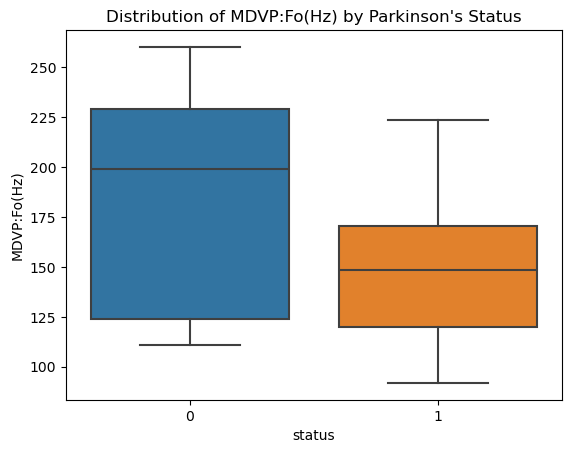

In [89]:
# plot for feature
sns.boxplot(x=Y_train, y=X_train['MDVP:Fo(Hz)'])
plt.title('Distribution of MDVP:Fo(Hz) by Parkinson\'s Status')
plt.show()


In [66]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 123 to 168
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       156 non-null    float64
 1   MDVP:Fhi(Hz)      156 non-null    float64
 2   MDVP:Flo(Hz)      156 non-null    float64
 3   MDVP:Jitter(%)    156 non-null    float64
 4   MDVP:Jitter(Abs)  156 non-null    float64
 5   MDVP:RAP          156 non-null    float64
 6   MDVP:PPQ          156 non-null    float64
 7   Jitter:DDP        156 non-null    float64
 8   MDVP:Shimmer      156 non-null    float64
 9   MDVP:Shimmer(dB)  156 non-null    float64
 10  Shimmer:APQ3      156 non-null    float64
 11  Shimmer:APQ5      156 non-null    float64
 12  MDVP:APQ          156 non-null    float64
 13  Shimmer:DDA       156 non-null    float64
 14  NHR               156 non-null    float64
 15  HNR               156 non-null    float64
 16  RPDE              156 non-null    float64


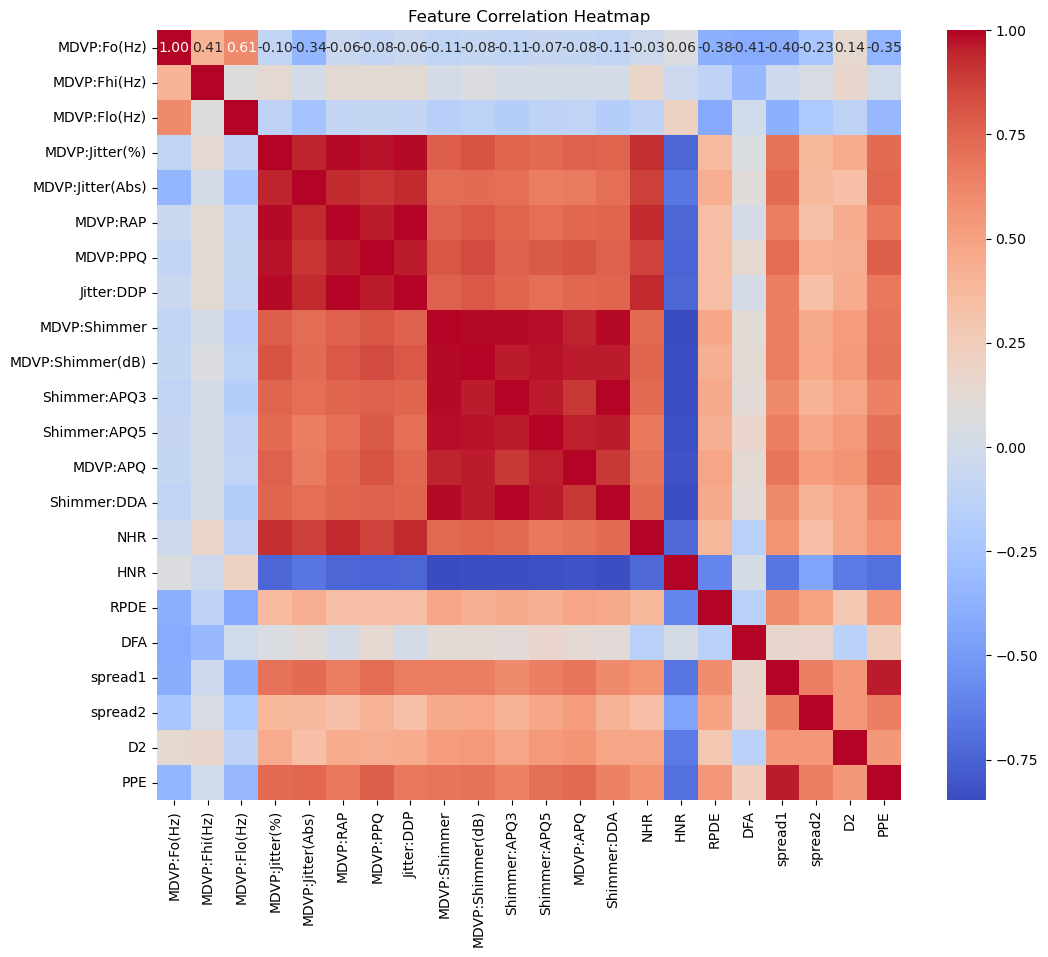

<Figure size 640x480 with 0 Axes>

In [85]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Feature Correlation Heatmap')
plt.show()
plt.savefig('Feat cor heatmap.png')

In [67]:
Y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 156 entries, 123 to 168
Series name: status
Non-Null Count  Dtype
--------------  -----
156 non-null    int64
dtypes: int64(1)
memory usage: 2.4 KB


Data Scaling

In [63]:
scaling = StandardScaler()

In [64]:
scaling.fit_transform(X_train)
scaling.fit_transform(X_test)

array([[-1.27434768e+00, -7.92100902e-01, -6.42064804e-01,
        -3.70550081e-02,  7.65593976e-01, -5.36663194e-02,
         2.70521702e-01, -5.17113412e-02, -1.73362776e-01,
        -1.84537779e-01, -2.46162360e-01, -9.53432617e-02,
         3.51764171e-02, -2.46253875e-01, -2.42578071e-01,
        -5.71526263e-01,  1.17904437e+00,  1.05108661e+00,
         5.45105104e-01,  2.12053870e+00,  2.20220746e-01,
         6.73407367e-01],
       [-9.93036290e-01, -7.55457877e-01, -6.02839911e-01,
         2.21517439e+00,  2.37519856e+00,  2.52231701e+00,
         1.86180632e+00,  2.52056878e+00,  6.63120841e-01,
         1.31330947e+00,  8.25344625e-01,  4.41243374e-01,
         3.16150237e-01,  8.25821477e-01,  7.63822230e-01,
        -1.17294582e+00,  9.93607948e-01,  1.27956439e+00,
         9.15137942e-01,  4.60066283e-01,  1.91967718e-01,
         1.05151668e+00],
       [-9.59040068e-01, -4.67857304e-01, -5.93333267e-01,
         1.66162458e+00,  1.97279742e+00,  1.61932286e+00,
    


## Parkinson’s disease status (binary classification) using RandomForestClassifier ##


In [69]:
rf_model = RandomForestClassifier(random_state=42) #initializing the model

In [70]:
#hyperparameters for gridsearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


In [71]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [90]:
#best model
best_rf_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}


In [91]:
Y_pred = best_rf_model.predict(X_test)

In [92]:
# evaluate
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.7692307692307693

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.62      0.53         8
           1       0.89      0.81      0.85        31

    accuracy                           0.77        39
   macro avg       0.67      0.72      0.69        39
weighted avg       0.80      0.77      0.78        39



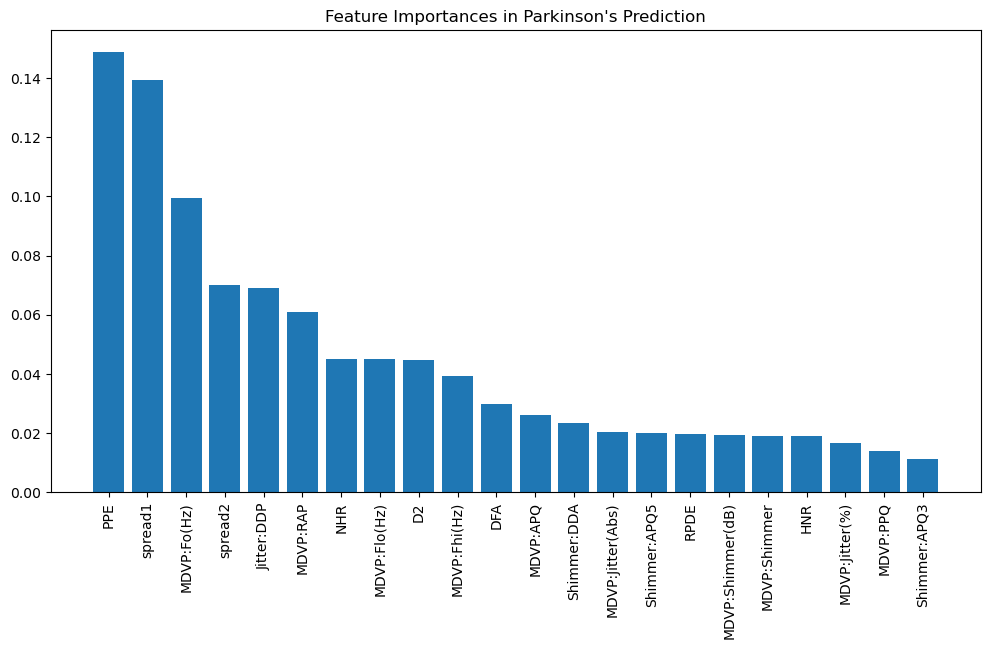

<Figure size 640x480 with 0 Axes>

In [84]:
importances = best_rf_model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances in Parkinson's Prediction")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.show()
plt.savefig('Feature Importance jupyter.png')

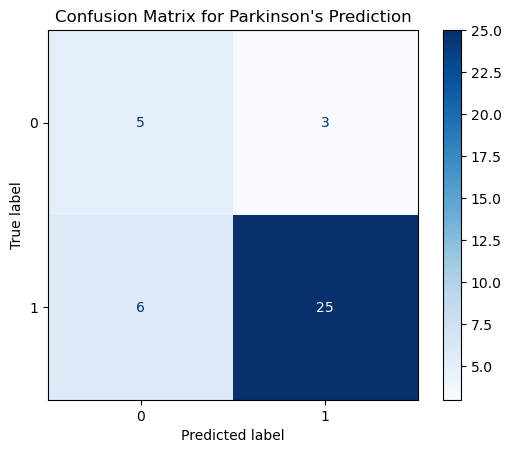

In [93]:
ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test, Y_test, cmap='Blues')
plt.title('Confusion Matrix for Parkinson\'s Prediction')
plt.show()


In [82]:
feature_importance_df = pd.DataFrame({'Feature': features[indices], 'Importance': importances[indices]})
feature_importance_df.to_csv("feature_importance.csv", index=False)


In [83]:
Y_test_pred_df = pd.DataFrame({'Actual': Y_test, 'Predicted': best_rf_model.predict(X_test)})
Y_test_pred_df.to_csv("predictions.csv", index=False)
